In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei'] 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

In [38]:
data_111 = np.loadtxt('./assets/各年度国民经济数据.csv', delimiter=',')
years_111 = data_111[:, 0].astype(int)
gdp_111 = data_111[:, 1]
primary_111 = data_111[:, 2]
secondary_111 = data_111[:, 3]
tertiary_111 = data_111[:, 4]

df_111 = pd.DataFrame({
    'Year': years_111,
    'GDP': gdp_111,
    'Primary': primary_111,
    'Secondary': secondary_111,
    'Tertiary': tertiary_111
})
print (df_111)


    Year        GDP  Primary  Secondary  Tertiary
0   2000   100280.1  14717.4    45663.7   39899.1
1   2001   110863.1  15502.5    49659.4   45701.2
2   2002   121717.4  16190.2    54104.1   51423.1
3   2003   137422.0  16970.2    62695.8   57756.0
4   2004   161840.2  20904.3    74285.0   66650.9
5   2005   187318.9  21806.7    88082.2   77430.0
6   2006   219438.5  23317.0   104359.2   91762.2
7   2007   270092.3  27674.1   126630.5  115787.7
8   2008   319244.6  32464.1   149952.9  136827.5
9   2009   348517.7  33583.8   160168.8  154765.1
10  2010   412119.3  38430.8   191626.5  182061.9
11  2011   487940.2  44781.5   227035.1  216123.6
12  2012   538580.0  49084.6   244639.1  244856.2
13  2013   592963.2  53028.1   261951.6  277983.5
14  2014   643563.1  55626.3   277282.8  310654.0
15  2015   688858.2  57774.6   281338.9  349744.7
16  2016   746395.1  60139.2   295427.8  390828.1
17  2017   832035.9  62099.5   331580.5  438355.9
18  2018   919281.1  64745.2   364835.2  489700.8


In [42]:
df_growth_111 = df_111[df_111['Year'] >= 2001].copy()
df_growth_111['GDP_growth'] = df_growth_111['GDP'].pct_change() * 100
df_growth_111['Primary_growth'] = df_growth_111['Primary'].pct_change() * 100
df_growth_111['Secondary_growth'] = df_growth_111['Secondary'].pct_change() * 100
df_growth_111['Tertiary_growth'] = df_growth_111['Tertiary'].pct_change() * 100
df_growth_111 = df_growth_111.dropna()
print(df_growth_111)

    Year        GDP  Primary  Secondary  Tertiary  GDP_growth  Primary_growth  \
2   2002   121717.4  16190.2    54104.1   51423.1    9.790724        4.436059   
3   2003   137422.0  16970.2    62695.8   57756.0   12.902510        4.817729   
4   2004   161840.2  20904.3    74285.0   66650.9   17.768771       23.182402   
5   2005   187318.9  21806.7    88082.2   77430.0   15.743122        4.316815   
6   2006   219438.5  23317.0   104359.2   91762.2   17.147015        6.925853   
7   2007   270092.3  27674.1   126630.5  115787.7   23.083370       18.686366   
8   2008   319244.6  32464.1   149952.9  136827.5   18.198334       17.308603   
9   2009   348517.7  33583.8   160168.8  154765.1    9.169489        3.449041   
10  2010   412119.3  38430.8   191626.5  182061.9   18.249174       14.432554   
11  2011   487940.2  44781.5   227035.1  216123.6   18.397804       16.525027   
12  2012   538580.0  49084.6   244639.1  244856.2   10.378280        9.609102   
13  2013   592963.2  53028.1

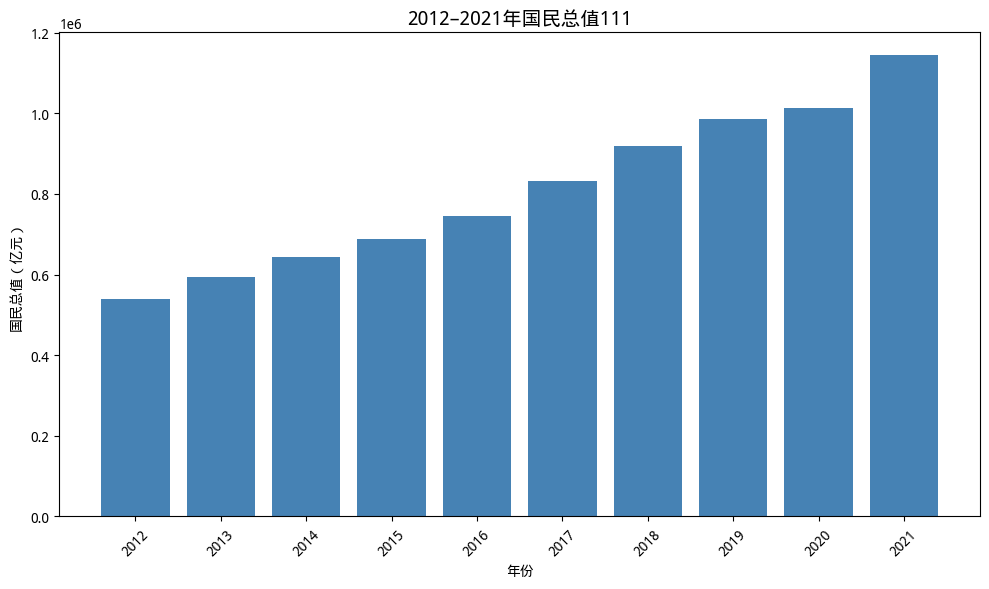

In [53]:
mask_bar = (years_111 >= 2012)
plt.figure(figsize=(10, 6))
plt.bar(years_111[mask_bar], gdp_111[mask_bar], color='steelblue')
plt.title(f'2012–2021年国民总值111', fontsize=14)
plt.xlabel('年份')
plt.ylabel('国民总值（亿元）')
plt.xticks(years_111[mask_bar], rotation=45)
plt.tight_layout()
plt.savefig('柱状图_2012-2021国民总值.png', dpi=300)
plt.show()


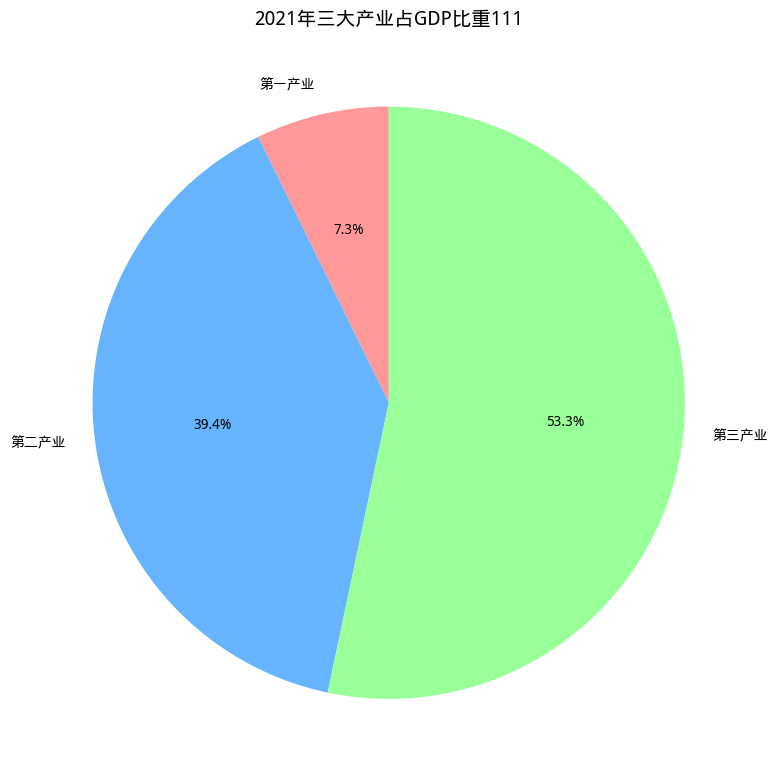

In [56]:
data_2021 = df_111[df_111['Year'] == 2021].iloc[0]
pie_vals = [data_2021['Primary'], data_2021['Secondary'], data_2021['Tertiary']]
labels = ['第一产业', '第二产业', '第三产业']

plt.figure(figsize=(8, 8))
plt.pie(pie_vals, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title(f'2021年三大产业占GDP比重111', fontsize=14)
plt.tight_layout()
plt.savefig('饼图_2021三大产业占比.png', dpi=300)
plt.show()


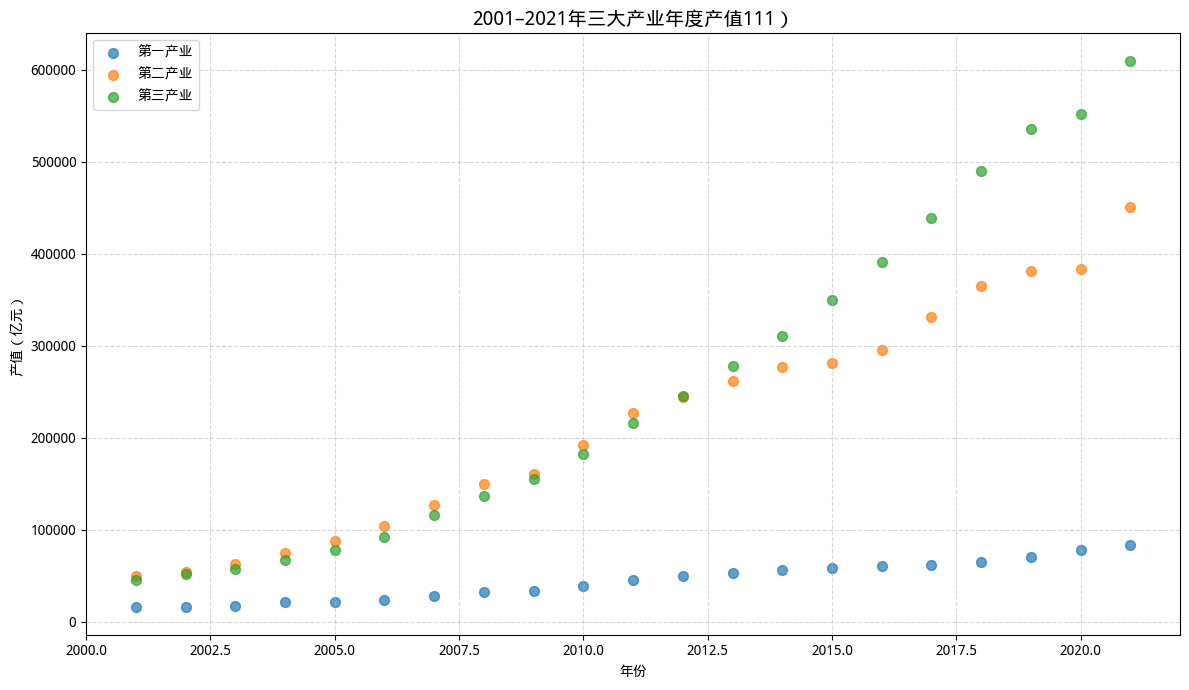

In [58]:
mask_scatter = (years_111 >= 2001)

plt.figure(figsize=(12, 7))
plt.scatter(years_111[mask_scatter], primary_111[mask_scatter], label='第一产业', alpha=0.7, s=50)
plt.scatter(years_111[mask_scatter], secondary_111[mask_scatter], label='第二产业', alpha=0.7, s=50)
plt.scatter(years_111[mask_scatter], tertiary_111[mask_scatter], label='第三产业', alpha=0.7, s=50)

plt.title(f'2001–2021年三大产业年度产值111）', fontsize=14)
plt.xlabel('年份')
plt.ylabel('产值（亿元）')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('散点图_2001-2021三大产业产值.png', dpi=300)
plt.show()


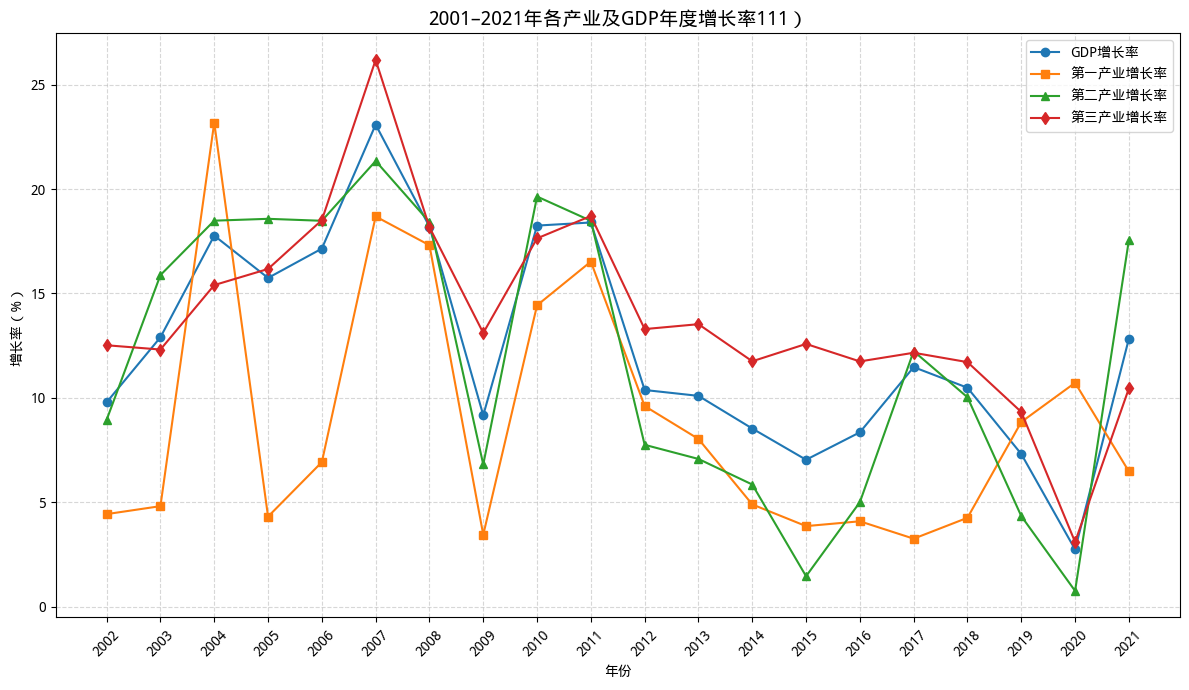

In [60]:
plt.figure(figsize=(12, 7))
plt.plot(df_growth_111['Year'], df_growth_111['GDP_growth'], label='GDP增长率', marker='o')
plt.plot(df_growth_111['Year'], df_growth_111['Primary_growth'], label='第一产业增长率', marker='s')
plt.plot(df_growth_111['Year'], df_growth_111['Secondary_growth'], label='第二产业增长率', marker='^')
plt.plot(df_growth_111['Year'], df_growth_111['Tertiary_growth'], label='第三产业增长率', marker='d')

plt.title(f'2001–2021年各产业及GDP年度增长率111）', fontsize=14)
plt.xlabel('年份')
plt.ylabel('增长率（%）')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(df_growth_111['Year'], rotation=45)
plt.tight_layout()
plt.savefig('折线图_2001-2021增长率.png', dpi=300)
plt.show()


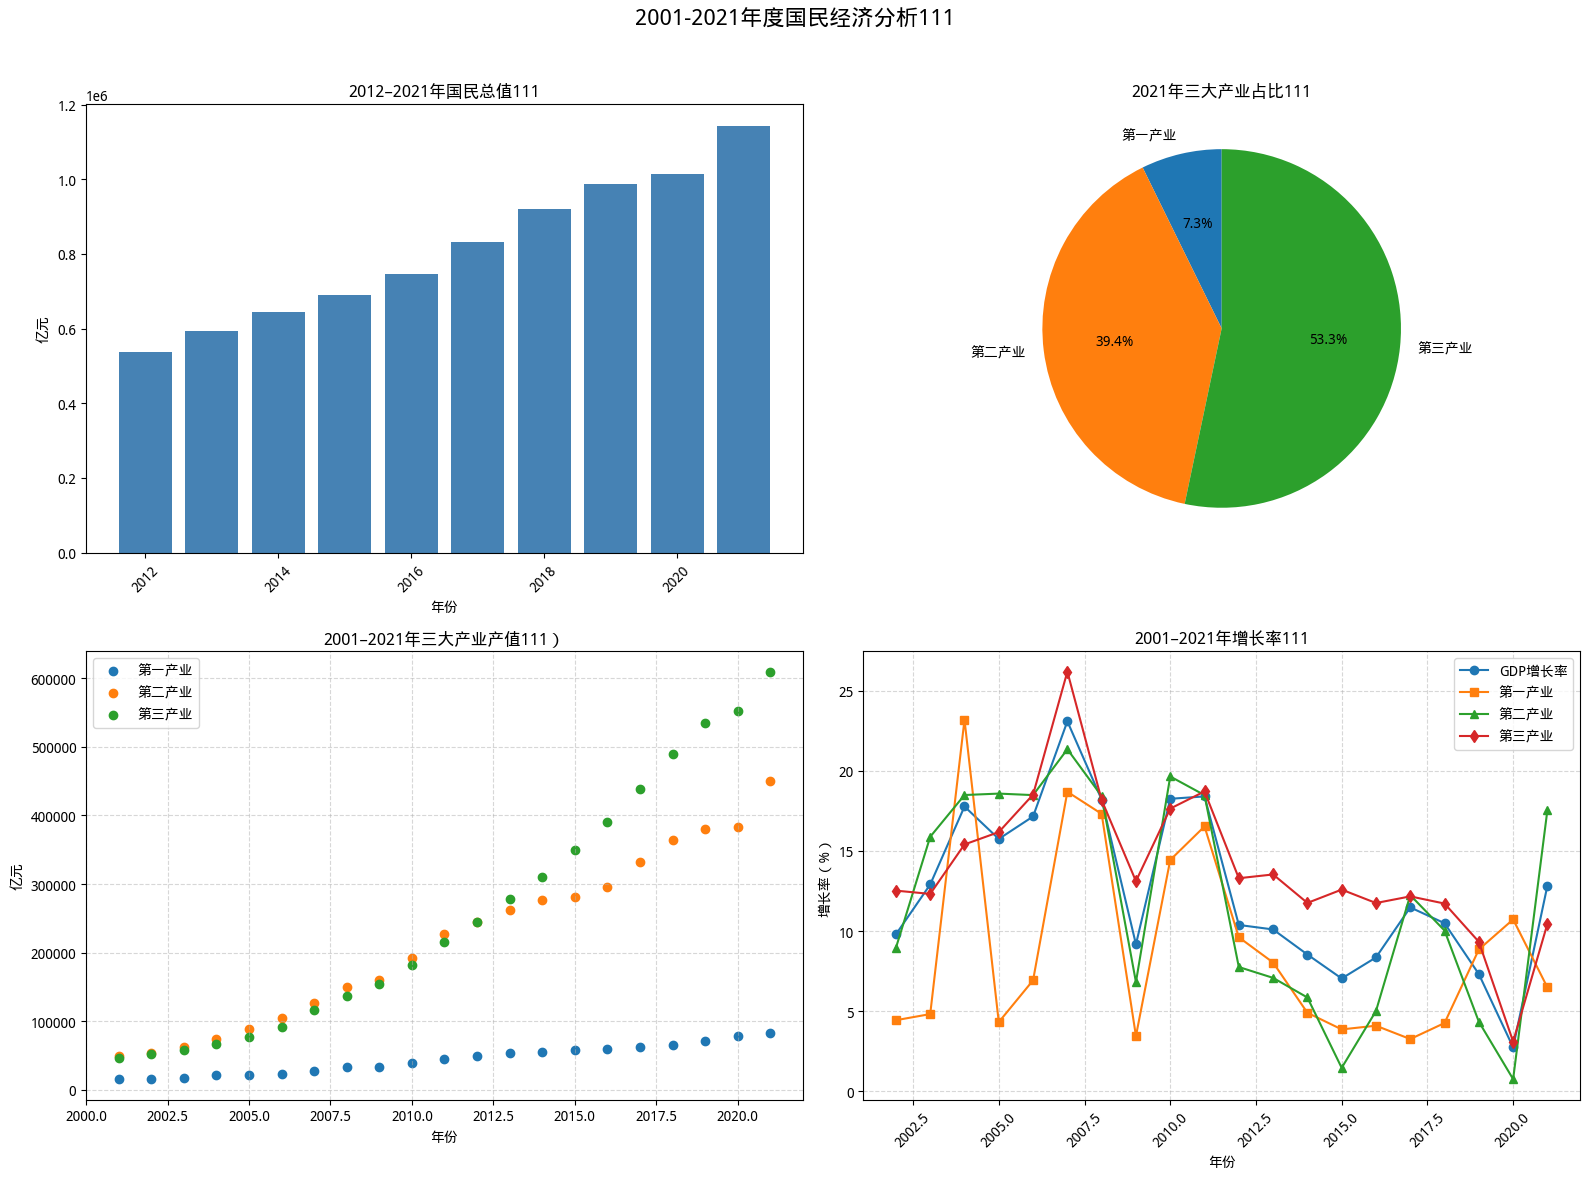

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'2001-2021年度国民经济分析111', fontsize=16)

axs[0,0].bar(years_111[years_111>=2012], gdp_111[years_111>=2012], color='steelblue')
axs[0,0].set_title(f'2012–2021年国民总值111')
axs[0,0].set_xlabel('年份'); axs[0,0].set_ylabel('亿元')
axs[0,0].tick_params(axis='x', rotation=45)

axs[0,1].pie(pie_vals, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0,1].set_title(f'2021年三大产业占比111')

axs[1,0].scatter(years_111[mask_scatter], primary_111[mask_scatter], label='第一产业')
axs[1,0].scatter(years_111[mask_scatter], secondary_111[mask_scatter], label='第二产业')
axs[1,0].scatter(years_111[mask_scatter], tertiary_111[mask_scatter], label='第三产业')
axs[1,0].set_title(f'2001–2021年三大产业产值111）')
axs[1,0].set_xlabel('年份'); axs[1,0].set_ylabel('亿元')
axs[1,0].legend(); axs[1,0].grid(True, ls='--', alpha=0.5)

axs[1,1].plot(df_growth_111['Year'], df_growth_111['GDP_growth'], label='GDP增长率', marker='o')
axs[1,1].plot(df_growth_111['Year'], df_growth_111['Primary_growth'], label='第一产业', marker='s')
axs[1,1].plot(df_growth_111['Year'], df_growth_111['Secondary_growth'], label='第二产业', marker='^')
axs[1,1].plot(df_growth_111['Year'], df_growth_111['Tertiary_growth'], label='第三产业', marker='d')
axs[1,1].set_title(f'2001–2021年增长率111')
axs[1,1].set_xlabel('年份'); axs[1,1].set_ylabel('增长率（%）')
axs[1,1].legend(); axs[1,1].grid(True, ls='--', alpha=0.5)
axs[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('2001-2021年度国民经济分析.png', dpi=300, bbox_inches='tight')
plt.show()
